In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [13]:
df = pd.read_csv('/content/sample_data/Mall_Customers.csv')

In [14]:
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
print(df.shape)

(200, 5)


In [5]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [6]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)']].copy()

In [7]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [9]:
# Scale features for K-Means
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [10]:
# Elbo Method to find optimal k
arr = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(x_scaled)
    arr.append(kmeans.inertia_)

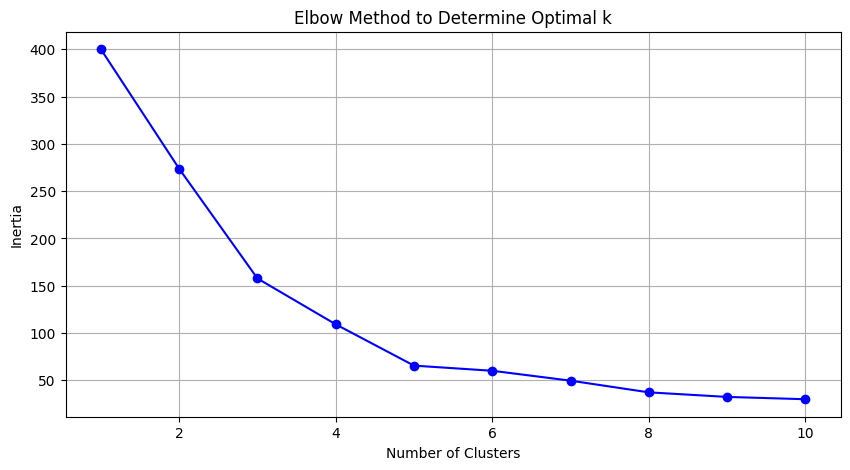

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), arr, marker='o', color='b', linestyle='-', markersize=6)
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

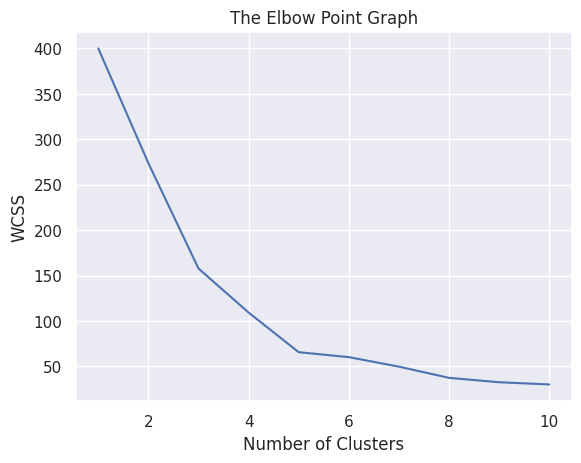

In [13]:
import seaborn as sns
sns.set()
plt.plot(range(1,11), arr)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
# Apply kMeans
optimal_k = 5
kmeans = KMeans(n_clusters= optimal_k, init = 'k-means++', random_state= 42)
y = kmeans.fit_predict(x_scaled)

In [18]:
print(y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [3]:
# Map numeric cluster labels to descriptive segments (verify by inspecting df stats)
cluster_labels = {
    0: 'Low Income, Low Spending',
    1: 'High Income, High Spending',
    2: 'Moderate Income, High Spending',
    3: 'High Income, Low Spending',
    4: 'Moderate Income, Low Spending'
}

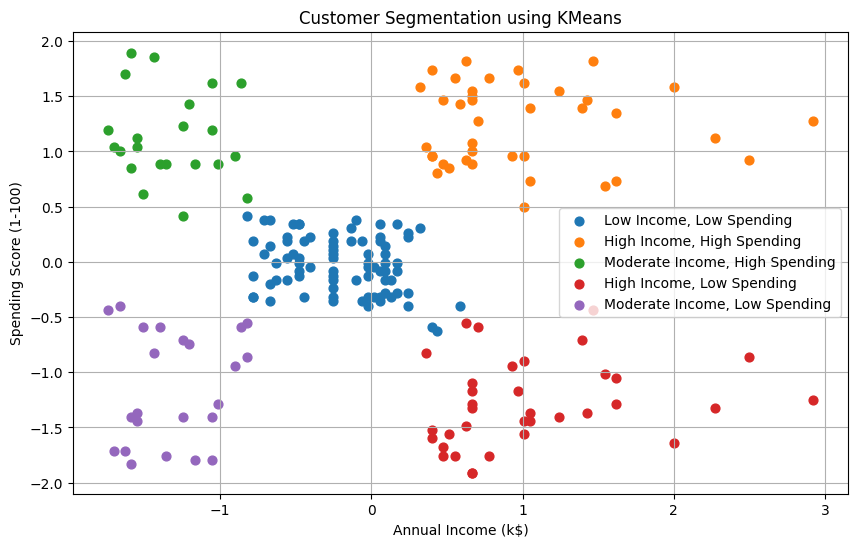

In [15]:
# Visualize Segments
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Load the data
df = pd.read_csv('/content/sample_data/Mall_Customers.csv')

# Scale features for K-Means
x = df[['Annual Income (k$)', 'Spending Score (1-100)']].copy()
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Apply kMeans
optimal_k = 5
kmeans = KMeans(n_clusters= optimal_k, init = 'k-means++', random_state= 42)
y = kmeans.fit_predict(x_scaled)

# Map numeric cluster labels to descriptive segments (verify by inspecting df stats)
cluster_labels = {
    0: 'Low Income, Low Spending',
    1: 'High Income, High Spending',
    2: 'Moderate Income, High Spending',
    3: 'High Income, Low Spending',
    4: 'Moderate Income, Low Spending'
}

plt.figure(figsize=(10, 6))
for lbl, name in cluster_labels.items():
    plt.scatter(x_scaled[y == lbl, 0], x_scaled[y == lbl, 1],  label=name, s = 40)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation using KMeans')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# summary table
df['Segment'] = pd.Series(y).map(cluster_labels)
summary = df.groupby('Segment')[['Annual Income (k$)','Spending Score (1-100)']].mean().round(2)
print('Cluster Summary Table:')
print(summary)

Cluster Summary Table:
                                Annual Income (k$)  Spending Score (1-100)
Segment                                                                   
High Income, High Spending                   86.54                   82.13
High Income, Low Spending                    88.20                   17.11
Low Income, Low Spending                     55.30                   49.52
Moderate Income, High Spending               25.73                   79.36
Moderate Income, Low Spending                26.30                   20.91


In [17]:
# save results
df.to_csv('Clustered_Customers.csv', index=False)
print("Saved clustered data to 'Clustered_Customers.csv'")

Saved clustered data to 'Clustered_Customers.csv'


In [18]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Segment
0,1,Male,19,15,39,"Moderate Income, Low Spending"
1,2,Male,21,15,81,"Moderate Income, High Spending"
2,3,Female,20,16,6,"Moderate Income, Low Spending"
3,4,Female,23,16,77,"Moderate Income, High Spending"
4,5,Female,31,17,40,"Moderate Income, Low Spending"
...,...,...,...,...,...,...
195,196,Female,35,120,79,"High Income, High Spending"
196,197,Female,45,126,28,"High Income, Low Spending"
197,198,Male,32,126,74,"High Income, High Spending"
198,199,Male,32,137,18,"High Income, Low Spending"
